In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from pandas.io.json import json_normalize
import json
import pymongo
import pprint
from pymongo import MongoClient
%matplotlib inline

## Connecting to the yelp data base

In [5]:
client = MongoClient('mongodb://localhost:27017')
db = client.yelp
con_check = str(db)
if con_check.find('yelp') != int(-1):
    print('...Connected')
else:
    print('...Connection Failed')


...Connected


## Exploring business collection in the yelp DB 

In [6]:
# Building a small exploratory data frame limiting to 2 objects
business_data = list(db.business.find().limit(2))
business_df = pd.DataFrame(business_data)
business_df



,_id,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,57712b737b99e72215506d99,"{'Has TV': False, 'Attire': 'casual', 'Takes R...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Monday': {'close': '21:00', 'open': '11:00'}...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,57712b737b99e72215506d9a,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business


In [7]:
# Normalized data frame
business_norm_df = pd.DataFrame(json_normalize(business_data)) 
business_norm_df


,_id,attributes.Accepts Credit Cards,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,attributes.Ambience.touristy,...,hours.Wednesday.open,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,57712b737b99e72215506d99,True,none,False,False,False,False,False,False,False,...,11:00,40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,57712b737b99e72215506d9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business


## Exploring checkin collection in the yelp DB

In [8]:
# Building a small exploratory data frame limiting to 2 objects
checkin_data = list(db.checkin.find().limit(2))
checkin_df = pd.DataFrame(checkin_data)
checkin_df

,_id,business_id,checkin_info,type
0,57712baa7b99e72215519c1e,mVHrayjG3uZ_RLHkLj-AMg,"{'15-1': 1, '10-5': 1, '21-4': 1, '11-5': 1, '...",checkin
1,57712baa7b99e72215519c1f,b12U9TFESStdy7CsTtcOeg,"{'5-1': 2, '5-5': 2, '8-2': 1}",checkin


In [9]:
# Normalized data frame
checkin_norm_df = pd.DataFrame(json_normalize(checkin_data)) 
checkin_norm_df

,_id,business_id,checkin_info.10-4,checkin_info.10-5,checkin_info.11-5,checkin_info.12-1,checkin_info.12-5,checkin_info.13-1,checkin_info.14-4,checkin_info.15-0,...,checkin_info.16-2,checkin_info.17-4,checkin_info.21-4,checkin_info.22-5,checkin_info.5-1,checkin_info.5-5,checkin_info.8-2,checkin_info.9-4,checkin_info.9-5,type
0,57712baa7b99e72215519c1e,mVHrayjG3uZ_RLHkLj-AMg,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,3.0,1.0,checkin
1,57712baa7b99e72215519c1f,b12U9TFESStdy7CsTtcOeg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,1.0,NaN,NaN,checkin


## Exploring review collection in the yelp DB

In [10]:
# Building a small exploratory data frame limiting to 2 objects
review_data = list(db.review.find().limit(2))
review_df = pd.DataFrame(review_data)
review_df

,_id,business_id,date,review_id,stars,text,type,user_id,votes
0,57712bd37b99e7221552752f,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,"{'useful': 0, 'funny': 0, 'cool': 0}"
1,57712bd37b99e72215527530,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,"{'useful': 0, 'funny': 0, 'cool': 0}"


In [11]:
# Normalized data frame
review_norm_df = pd.DataFrame(json_normalize(review_data)) 
review_norm_df

,_id,business_id,date,review_id,stars,text,type,user_id,votes.cool,votes.funny,votes.useful
0,57712bd37b99e7221552752f,5UmKMjUEUNdYWqANhGckJw,2012-08-01,Ya85v4eqdd6k9Od8HbQjyA,4,"Mr Hoagie is an institution. Walking in, it do...",review,PUFPaY9KxDAcGqfsorJp3Q,0,0,0
1,57712bd37b99e72215527530,5UmKMjUEUNdYWqANhGckJw,2015-10-31,fFSoGV46Yxuwbr3fHNuZig,5,Yes this place is a little out dated and not o...,review,auESFwWvW42h6alXgFxAXQ,0,0,0


## Exploring tip collection in the yelp DB

In [12]:
# Building a small exploratory data frame limiting to 2 objects
tip_data = list(db.tip.find().limit(2))
tip_df = pd.DataFrame(tip_data)
tip_df
# no nested objects >> no need to normalize

,_id,business_id,date,likes,text,type,user_id
0,57712e7b7b99e722158ee6ef,cE27W9VPgO88Qxe4ol6y_g,2013-04-18,0,Don't waste your time.,tip,-6rEfobYjMxpUWLNxszaxQ
1,57712e7b7b99e722158ee6f0,mVHrayjG3uZ_RLHkLj-AMg,2013-01-06,1,Your GPS will not allow you to find this place...,tip,EZ0r9dKKtEGVx2CdnowPCw


## Exploring tip collection in the yelp DB

In [13]:
# Building a small exploratory data frame limiting to 2 objects
user_data = list(db.user.find().limit(2))
user_df = pd.DataFrame(user_data)
user_df

,_id,average_stars,compliments,elite,fans,friends,name,review_count,type,user_id,votes,yelping_since
0,57712ea47b99e7221597eee7,4.14,"{'plain': 25, 'hot': 48, 'funny': 11, 'photos'...","[2005, 2006]",70,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,"{'useful': 280, 'funny': 167, 'cool': 245}",2004-10
1,57712ea47b99e7221597eee8,4.64,{'cute': 2},[],2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,"{'useful': 11, 'funny': 1, 'cool': 5}",2004-10


In [14]:
# Normalized data frame
user_norm_df = pd.DataFrame(json_normalize(user_data)) 
user_norm_df

,_id,average_stars,compliments.cool,compliments.cute,compliments.funny,compliments.hot,compliments.more,compliments.note,compliments.photos,compliments.plain,...,fans,friends,name,review_count,type,user_id,votes.cool,votes.funny,votes.useful,yelping_since
0,57712ea47b99e7221597eee7,4.14,78.0,15,11.0,48.0,3.0,20.0,14.0,25.0,...,70,"[rpOyqD_893cqmDAtJLbdog, 4U9kSBLuBDU391x6bxU-Y...",Russel,108,user,18kPq7GPye-YQ3LyKyAZPw,245,167,280,2004-10
1,57712ea47b99e7221597eee8,4.64,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,2,"[18kPq7GPye-YQ3LyKyAZPw, rpOyqD_893cqmDAtJLbdo...",Ken,11,user,fHtTaujcyKvXglE33Z5yIw,5,1,11,2004-10


In [15]:
users = (list(db.user.find({},{"_id":0})))
users_df = pd.DataFrame(users)
users = []


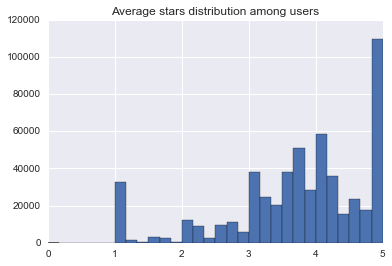

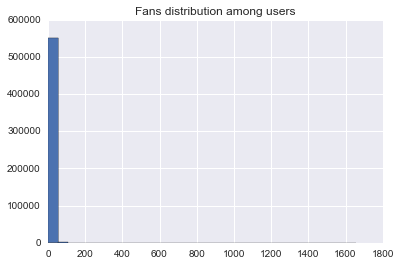

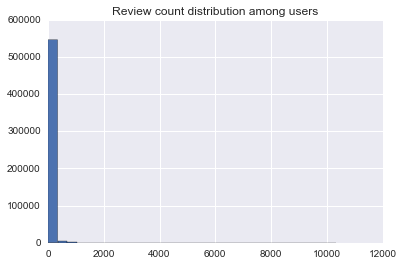

In [35]:
plt.figure()
plt.hist(users_df.average_stars, 30)
plt.title('Average stars distribution among users')
plt.figure()
plt.hist(users_df.fans,30 )
plt.title('Fans distribution among users')
plt.figure()
plt.hist(users_df.review_count,30 )
plt.title('Review count distribution among users')

In [24]:
# Getting friends count of each user in the data set
friendsnum = list()
for friends in users_df.friends:
    friendsnum.append(len(friends))
users_df['num_friends'] = friendsnum
print('Max friends',users_df.num_friends.max())
print('Min friends',users_df.num_friends.min())
print('Mean friends',users_df.num_friends.mean())
print('Std friends',users_df.num_friends.std())
print('Users with the biggest friends count:')
print(users_df.sort_values('num_friends', ascending = False).num_friends.head())
# 

Max friends 3812
Min friends 0
Mean friends 6.452227707983684
Std friends 38.26312367650042
Users with the biggest friends count:
133934    3812
78549     3206
153684    3162
325601    2789
152114    2485
Name: num_friends, dtype: int64


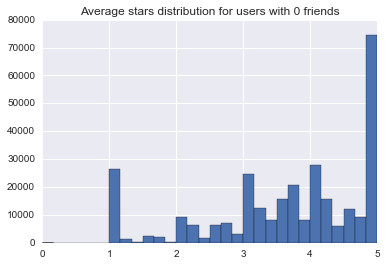

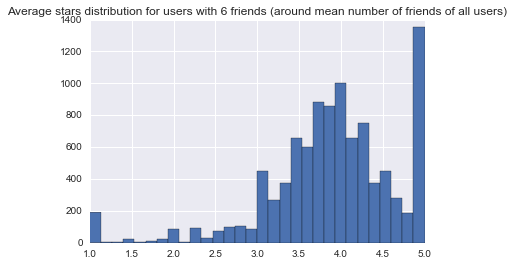

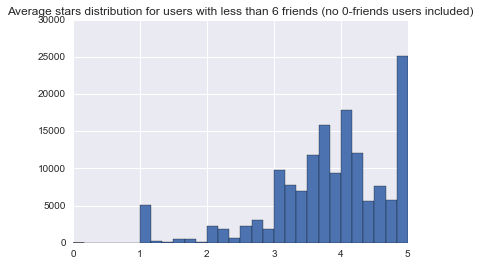

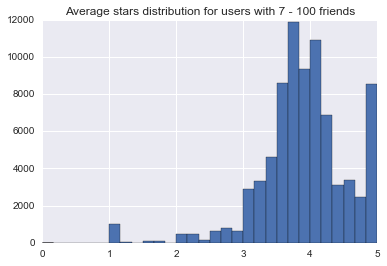

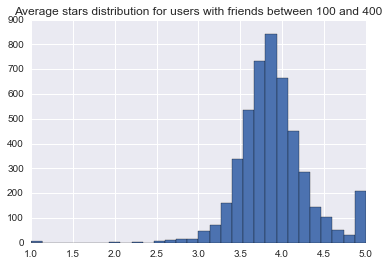

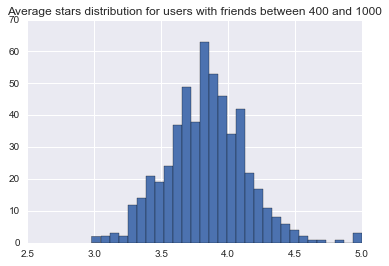

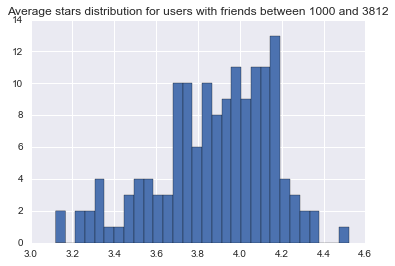

In [56]:
plt.figure()
plt.hist(users_df.average_stars[users_df.num_friends == 0], 30)
plt.title('Average stars distribution for users with 0 friends')

plt.figure()
plt.hist(users_df.average_stars[users_df.num_friends == 6], 30)
plt.title('Average stars distribution for users with 6 friends (around mean number of friends of all users)')

plt.figure()
plt.hist(users_df.average_stars[(users_df.num_friends < 6) & (users_df.num_friends != 0)], 30)
plt.title('Average stars distribution for users with less than 6 friends (no 0-friends users included)')

plt.figure()
plt.hist(users_df.average_stars[(users_df.num_friends > 6) & (users_df.num_friends<= 100) ], 30)
# check all interval from 6 to 3812 with increment 100 > all interval give more or less the same shape of the distribution 
plt.title('Average stars distribution for users with 7 - 100 friends')

plt.figure()
plt.hist(users_df.average_stars[(users_df.num_friends > 100) & (users_df.num_friends<= 400)], 30)
plt.title('Average stars distribution for users with friends between 100 and 400')

plt.figure()
plt.hist(users_df.average_stars[(users_df.num_friends > 400) & (users_df.num_friends<= 1000) ], 30)
 
plt.title('Average stars distribution for users with friends between 400 and 1000')

plt.figure()
plt.hist(users_df.average_stars[(users_df.num_friends > 1000) & (users_df.num_friends<= 3812)], 30) 
plt.title('Average stars distribution for users with friends between 1000 and 3812')

# 

In [60]:
print('friends = 0 users num', users_df.average_stars[users_df.num_friends == 0].count())
print('friends = 6 users num', users_df.average_stars[users_df.num_friends == 6].count())
print('1-5 friends users num', users_df.average_stars[(users_df.num_friends < 6) & (users_df.num_friends != 0)].count())
print('7-100 friends users num', users_df.average_stars[(users_df.num_friends > 6) & (users_df.num_friends<= 100)].count())
print('100-400 friends users num', users_df.average_stars[(users_df.num_friends > 100) & (users_df.num_friends<= 400)].count())
print('400-1000 friends users num', users_df.average_stars[(users_df.num_friends > 400) & (users_df.num_friends<= 1000)].count())
print('1000-3812 friends users num', users_df.average_stars[(users_df.num_friends > 1000) & (users_df.num_friends<= 3812)].count())



friends = 0 users num 302899
friends = 6 users num 9997
1-5 friends users num 153801
7-100 friends users num 80229
100-400 friends users num 4727
400-1000 friends users num 537
1000-3812 friends users num 149


Initial overview of average stars distributions showed that average stars statistic vary for users with different number of friends. Preliminary based on this criteria there are sevral group of users revealed:
* Users with 0 friends >> this is the most numerous group. Intrestingly that users with 0 friends are more likely to have 5 stars. 
#!!!QUESTION!!!: What could be the reason of such shift towards 5 stars? How to understand that?
* Users with 1-5 friends >> the next biggest group after 0-friended group. 
* Users with 6 friends. Friends numbers across all users have 6.4 friends mean value. So it was interesting to see there as well. !!!QUESTION!!!: maybe it will be worth to recalculate the mean without 0-friended group as it effects the mean value drastically? 
* Users with 7-100 friends and users with friends from 100 - 3812 (could be combined in one group I guess)
Intrestingly, that as number of friends increses the average stars shift to the left. For example users with 6 friends or less are more likely to have a 5 stars average rating while users with bigger number of friends will less likely have 5 star rating

